In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.size'] = 11
from scipy.optimize import curve_fit

import pandas as pd

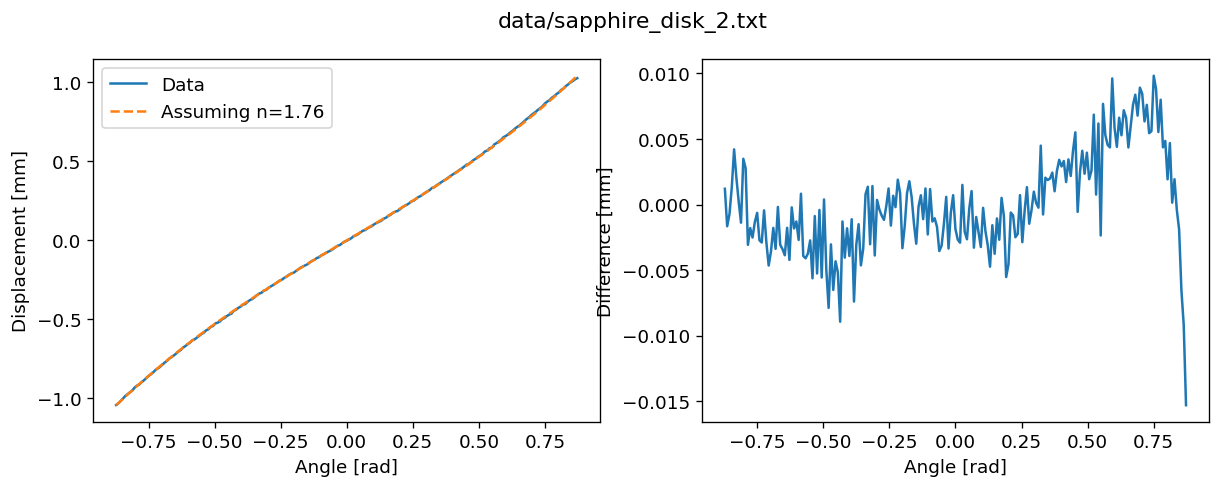

In [29]:
# Functional form of the displacement as a function of angle,
# including extra parameters for phase and displacement offsets
#d = 1.01 # In mm
n0 = 1.00029 # Weisstein Eric. Index of Refraction. Wolfram Research. 2005.

file = 'data/sapphire_disk_2.txt'
#file = 'data/bk7_glass.txt'
theoreticalIOR = 1.760
#theoreticalIOR = 1.515
d = 2.29 # for sapphire sample
#d = 5.59 # for bk7 glass slab
#w = .84 # Cuvette wall width
#d = 2*w # Empty cuvette
#d = 11.96 - 2*w # Oil cuvette

data = pd.read_csv(file)

# Convert to radians and mm
angleArr = -data["angle"] * np.pi / 180
displacementArr = data["gauss_center"] * 1e-3 - np.mean(data["gauss_center"] * 1e-3)
#angleArr = angleArr[len(angleArr)//2:]
#displacementArr = displacementArr[len(displacementArr)//2:]

#angleArr *= .95

# Theta should be in radians
def func_form(theta, a0, a1, a2):
    return a0 + d*np.sin(theta + a1)*(1 - (n0 * np.cos(theta + a1))/np.sqrt(a2**2 - n0**2 * np.sin(theta + a1)**2))

#testAngleArr = np.linspace(-1, 1, 100)
testDisplacementArr = [func_form(t, 0, 0, theoreticalIOR) for t in angleArr]

fig, ax = plt.subplots(1, 2, figsize=(12,4))

ax[0].plot(angleArr, displacementArr, label='Data')
ax[0].plot(angleArr, testDisplacementArr, '--', label=f'Assuming n={theoreticalIOR}')
ax[0].set_ylabel('Displacement [mm]')
ax[0].set_xlabel('Angle [rad]')
ax[0].legend()

ax[1].plot(angleArr, displacementArr - testDisplacementArr)
ax[1].set_xlabel('Angle [rad]')
ax[1].set_ylabel('Difference [mm]')
fig.suptitle(file)
#plt.savefig('images/sapphire_fit.png')
plt.show()

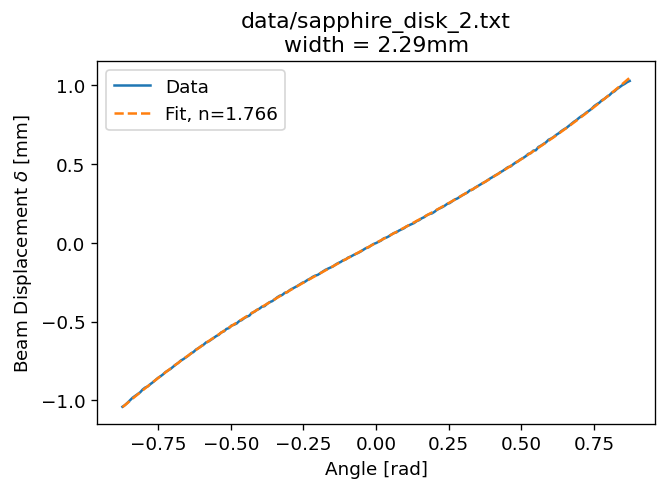

In [31]:
# Now actually do the curve fitting
popt, pcov = curve_fit(func_form, angleArr, displacementArr,
                       #method='trf',
                       # Bounds for [width, displacement offset, phase offset, IoR]
                       bounds=([-6, -np.pi/2 + .01, 1.2], # Lower bound
                               [6, np.pi/2 - .01, 1.9])) # Upper bound

plt.plot(angleArr, displacementArr, label='Data')
#plt.plot(angleArr, displacementArr - func_form(angleArr, *popt))
plt.plot(angleArr, func_form(angleArr, *popt), '--', label=f'Fit, n={popt[2]:.4}')
#plt.plot(angleArr, func_form(angleArr, popt[0], popt[1], 1.54), '--')
#plt.axvline(popt[1], linestyle='--', color='g')
plt.xlabel('Angle [rad]')
plt.ylabel(r'Beam Displacement $\delta$ [mm]')
plt.legend()
plt.title(f'{file}\nwidth = {d}mm')
#print(f'Real phase difference: {phaseDiff}')
#print(f'Calculated phase difference {popt}')
plt.savefig('images/saphire_fit.png')
plt.show()

In [25]:
print(popt)

[-0.00403674  0.03524607  1.77306996]
